In [218]:
!pip install catboost

In [219]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [220]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [221]:
files_path = "/content/drive/MyDrive/Colab Notebooks/Yandex_trains/HW 5"
train_path = files_path + '/train.csv'
test_path = files_path + '/test.csv'

data = pd.read_csv(train_path)

In [222]:
data.head(5)

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4,target
0,75516,1731.4840,411.7352,245.7620,0.8023,310.0806,0.9148,82546,0.7169,1.6753,0.3165,0.7531,0.0055,0.0033,0.5672,0.9502,1
1,98903,1374.4370,477.2451,269.7676,0.8249,354.8622,0.9585,103181,0.7679,1.7691,0.6579,0.7436,0.0048,0.0027,0.5529,0.9781,0
2,84746,1311.1570,482.7735,235.9040,0.8725,328.4843,0.9121,92914,0.7162,2.0465,0.6195,0.6804,0.0057,0.0028,0.4630,0.9474,1
3,98184,1463.1680,434.3769,292.6472,0.7390,353.5700,0.9543,102890,0.7316,1.4843,0.5763,0.8140,0.0044,0.0030,0.6625,0.9834,0
4,94170,1267.7271,440.1109,278.4162,0.7745,346.2672,0.9643,97656,0.6836,1.5808,0.7363,0.7868,0.0047,0.0030,0.6190,0.9785,0


In [223]:
data[data.isna() == True].count()

,0
area,0
perimeter,0
major_axis,0
minor_axis,0
eccentricity,0
eqdiasq,0
solidity,0
convex_area,0
extent,0
aspect_ratio,0


In [224]:
df = data.copy()

df['target'] = pd.to_numeric(df['target'], errors='coerce')

zr = df[df.target == 0]
on = df[df.target == 1]

In [225]:
num_cols = df.columns

In [226]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [227]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [229]:
import catboost

In [230]:
boost_model = catboost.CatBoostClassifier(n_estimators=600, max_depth=3, learning_rate=0.1)

boost_model.fit(X_train_scaled, y_train)

0:	learn: 0.6170351	total: 1.71ms	remaining: 1.02s
1:	learn: 0.5528722	total: 3.06ms	remaining: 914ms
2:	learn: 0.5110073	total: 4.31ms	remaining: 858ms
3:	learn: 0.4797346	total: 5.57ms	remaining: 830ms
4:	learn: 0.4487743	total: 6.8ms	remaining: 810ms
5:	learn: 0.4232413	total: 8.01ms	remaining: 793ms
6:	learn: 0.4049263	total: 9.22ms	remaining: 781ms
7:	learn: 0.3908869	total: 10.5ms	remaining: 777ms
8:	learn: 0.3750120	total: 11.7ms	remaining: 769ms
9:	learn: 0.3648805	total: 12.9ms	remaining: 763ms
10:	learn: 0.3550270	total: 15.3ms	remaining: 817ms
11:	learn: 0.3444804	total: 16.5ms	remaining: 807ms
12:	learn: 0.3390146	total: 17.7ms	remaining: 800ms
13:	learn: 0.3332075	total: 18.9ms	remaining: 792ms
14:	learn: 0.3288830	total: 20.1ms	remaining: 785ms
15:	learn: 0.3237299	total: 21.3ms	remaining: 779ms
16:	learn: 0.3200889	total: 22.6ms	remaining: 777ms
17:	learn: 0.3166921	total: 23.9ms	remaining: 771ms
18:	learn: 0.3142425	total: 25ms	remaining: 766ms
19:	learn: 0.3116686	tota

In [231]:
param_grid = {
    'n_estimators': [150],
    'max_depth' : [3, 4],
    'learning_rate': [0.1, 0.0095],

}

gridsearch = GridSearchCV(boost_model, param_grid, refit=True, scoring='accuracy',error_score='raise')

gridsearch.fit(X_train_scaled, y_train)

print(gridsearch.best_params_)

best_model_xboost = gridsearch.best_estimator_

0:	learn: 0.6427455	total: 1.04ms	remaining: 155ms
1:	learn: 0.6006451	total: 2.06ms	remaining: 153ms
2:	learn: 0.5692702	total: 2.92ms	remaining: 143ms
3:	learn: 0.5380208	total: 3.75ms	remaining: 137ms
4:	learn: 0.5109865	total: 4.59ms	remaining: 133ms
5:	learn: 0.4867071	total: 5.45ms	remaining: 131ms
6:	learn: 0.4652304	total: 6.28ms	remaining: 128ms
7:	learn: 0.4465962	total: 7.72ms	remaining: 137ms
8:	learn: 0.4309080	total: 8.55ms	remaining: 134ms
9:	learn: 0.4188238	total: 9.41ms	remaining: 132ms
10:	learn: 0.4074940	total: 10.3ms	remaining: 130ms
11:	learn: 0.3971297	total: 11.1ms	remaining: 128ms
12:	learn: 0.3876397	total: 11.9ms	remaining: 125ms
13:	learn: 0.3784747	total: 12.6ms	remaining: 123ms
14:	learn: 0.3696038	total: 13.4ms	remaining: 121ms
15:	learn: 0.3627771	total: 14.3ms	remaining: 119ms
16:	learn: 0.3558156	total: 15.2ms	remaining: 119ms
17:	learn: 0.3500660	total: 16ms	remaining: 117ms
18:	learn: 0.3438556	total: 16.7ms	remaining: 115ms
19:	learn: 0.3383428	tot

In [232]:
best_model_xboost.get_params()

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}

In [233]:
from sklearn.metrics import roc_auc_score, auc, roc_curve

def plot_roc_auc(model, X_train, X_test, y_train, y_test):
    # Предсказания вероятностей для обучающей и тестовой выборки
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Вычисление ROC-кривой
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    # Вычисление AUC
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.4f})')
    plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {auc_test:.4f})')

    # Линия случайного выбора
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Оформление графика
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

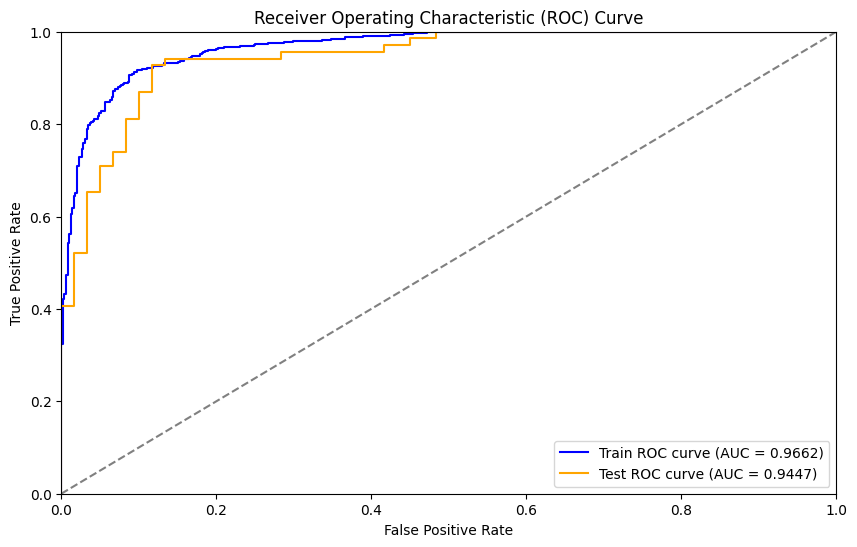

In [234]:
plot_roc_auc(best_model_xboost, X_train_scaled, X_test_scaled, y_train, y_test)

In [235]:
best_model = best_model_xboost
test = pd.read_csv(test_path)

X_test_submition = scaler.transform(test)

# Предсказания классов (0 или 1)
y_pred_model = best_model.predict(X_test_submition)

# Создаём DataFrame
submission = pd.DataFrame({
    "target": y_pred_model
})

# Сохраняем в CSV
submission.to_csv('./answer.csv', index=False)
